In [2]:
# Import pandas and read all the data
import pandas as pd
cab_url = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
cab_data = pd.read_csv(cab_url)
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_data.duplicated(subset='Transaction ID').any()

False

In [4]:
cab_data.shape

(359392, 7)

In [5]:
city_url = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
city_data = pd.read_csv(city_url)
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
city_data.duplicated(subset='City').any()

False

In [7]:
city_data.shape

(20, 3)

In [8]:
customer_url = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
customer_data = pd.read_csv(customer_url)
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
customer_data.duplicated(subset='Customer ID').any()

False

In [10]:
customer_data.shape

(49171, 4)

In [11]:
transaction_url = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
transaction_data = pd.read_csv(transaction_url)
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [12]:
transaction_data.duplicated(subset='Transaction ID').any()

False

In [13]:
transaction_data.shape

(440098, 3)

In [14]:
print(cab_data.isna().sum())
print(city_data.isna().sum())
print(customer_data.isna().sum())
print(transaction_data.isna().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [15]:
# Convert date into a more readable form
cab_data['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(cab_data['Date of Travel'], unit='D')
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


## Hypothesis

### 1. Distance, Cost, and Price are all positively correlated

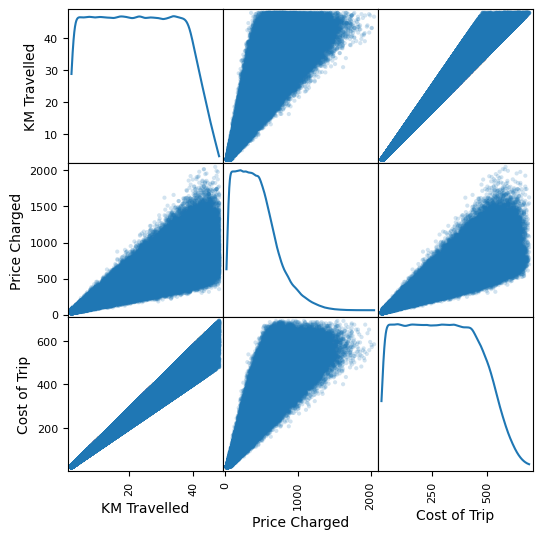

In [18]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(cab_data.iloc[:,-3:], alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

The above graph shows that the hypothesis is true as the graphs all show a strong positive trend.

### 2. Population and cab users in each city ispositively correlated

<function matplotlib.pyplot.show(close=None, block=None)>

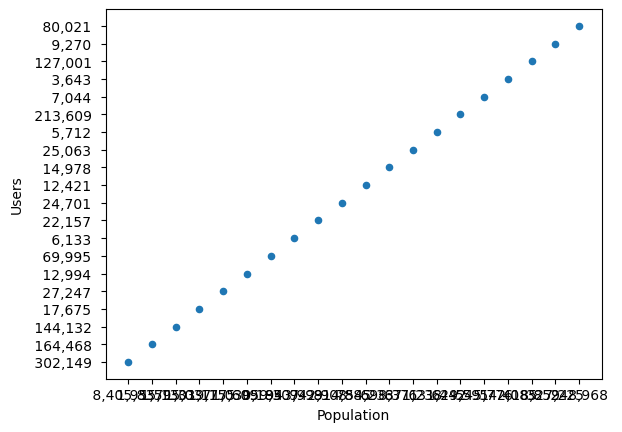

In [21]:
city_data.plot(kind='scatter', x='Population', y='Users')
plt.show

The above graph shows that the hypothesis is true as the data points forms almost a straight increasing line.

### 3. Is there seasonality in distance travelled?

<function matplotlib.pyplot.show(close=None, block=None)>

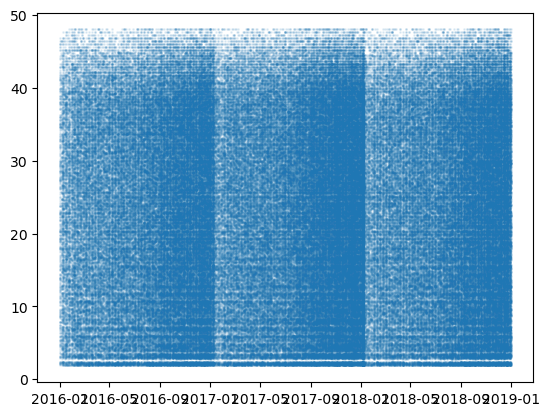

In [24]:
plt.scatter(cab_data['Date of Travel'], cab_data['KM Travelled'], s=1, alpha = 0.1, marker='o')
plt.show

Seems like distance travelled is scattered all around across the years, so there is no seasonality. However, there seems to be more points around winter time, so we are going to investigate seaonality in usage of cab service.

### 4. Is there seasonality in number of cab service used?

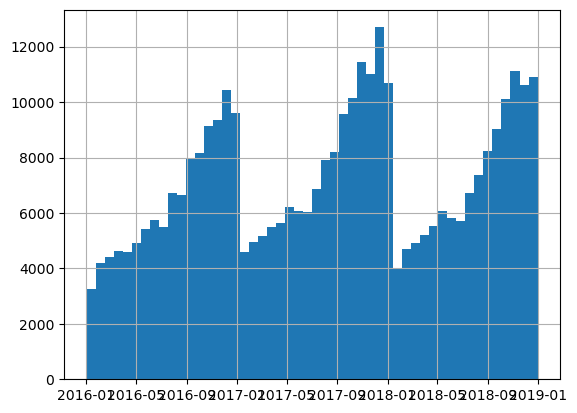

In [27]:
cab_data['Date of Travel'].hist(bins=50)
plt.grid(True)
plt.show()

As we can see from above histogram, number of cab service used does show some seasonality. It seems like every year starts off with less service, and it gradually increase over the year.

### 5. Are income and money spent on cab service correlated?

In [30]:
combined = pd.merge(cab_data, transaction_data, on='Transaction ID', how='inner')
combined = pd.merge(combined, customer_data, on='Customer ID', how='inner')
combined.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [31]:
income_date = pd.merge(combined.groupby(['Customer ID'])['Price Charged'].sum(), customer_data, on='Customer ID', how='inner')
income_date.head()

,Customer ID,Price Charged,Gender,Age,Income (USD/Month)
0,1,17490.13,Male,36,16359
1,2,23992.86,Male,31,12069
2,3,24828.35,Female,27,12968
3,4,16308.55,Male,33,13803
4,5,19310.97,Male,24,9965


<function matplotlib.pyplot.show(close=None, block=None)>

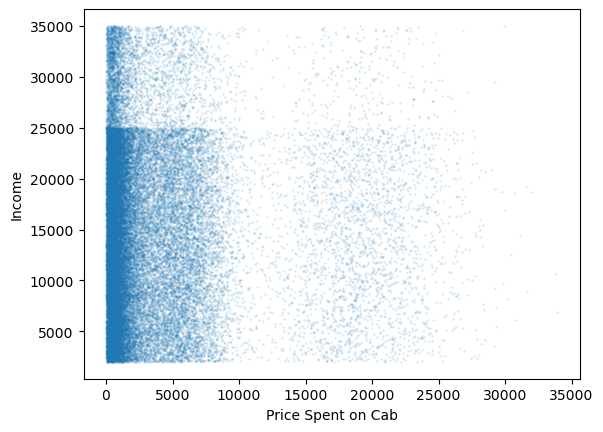

In [32]:
plt.scatter(income_date['Price Charged'], income_date['Income (USD/Month)'], s=1, alpha = 0.1, marker='o')
plt.xlabel('Price Spent on Cab')
plt.ylabel('Income')
plt.show

The graph does not show much correlation between money spent on cab and monthly income.